Import packages.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

Reuse forward euler method from previous example:

In [2]:
def forward_euler(func: Callable, y0: np.ndarray, t: np.ndarray) -> np.ndarray:
    """Generic forward euler method for initial value problem.

    Parameters
    ----------
    func : Callable
        ODE system to be solved
    y0 : np.ndarray
        Initial condition
    t : np.ndarray
        Time grid points

    Returns
    -------
    np.ndarray
        Solution of ODE system
    """
    y = np.zeros((len(y0),len(t)))
    h = t[1]-t[0]
    # initial condition
    y[:,0] = y0
    for i in range(1,len(t)):
        y[:,i] = y[:,i-1]+h*func(t[i-1], y[:,i-1])
    return y

## Numerical error

Define parameters

In [18]:
# ODE
def dcA(t, c):
    return -0.2*c

# initial condition
c0 = np.array([1])

# analytical solution of ODE
def cA_analytical(k: float, t: float) -> float:
    return np.exp(-k*t)

Define a fine and a coarse time grid.

In [19]:
t_coarse = np.linspace(0,30,11)
t_fine = np.linspace(0,30,101)

Calculate ODE solution and measure execution time.

In [20]:
start_coarse = time.time()
c_coarse = forward_euler(dcA, c0, t_coarse)
end_coarse = time.time()
time_coarse = end_coarse - start_coarse
print(f"Euler method for coarse grid took {round(time_coarse, 4)} seconds.")

start_fine = time.time()
c_fine = forward_euler(dcA, c0, t_fine)
end_fine = time.time()
time_fine = end_fine - start_fine
print(f"Euler method for fine grid took {round(time_fine, 4)} seconds.")

Euler method for coarse grid took 0.0018 seconds.
Euler method for fine grid took 0.001 seconds.


Plot the results.

/tmp/ipykernel_7313/2237883933.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


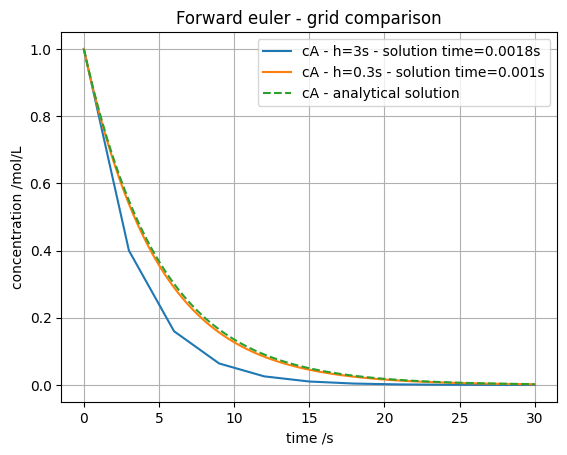

In [21]:
fig, ax = plt.subplots()
ax.plot(t_coarse, c_coarse[0,:], label = f"cA - h=3s - solution time={round(time_coarse, 4)}s")
ax.plot(t_fine, c_fine[0,:], label = f"cA - h=0.3s - solution time={round(time_fine, 4)}s")
ax.plot(t_fine, cA_analytical(0.2, t_fine), label = "cA - analytical solution", linestyle = "dashed")
ax.set_xlabel("time /s")
ax.set_ylabel("concentration /mol/L")
ax.set_title("Forward euler - grid comparison")
ax.legend()
ax.grid()
fig.show()

## Stability

Define parameters

In [22]:
# ODE
def dcA(t, c):
    return -0.2*c

# initial condition
c0 = np.array([1])

# analytical solution of ODE
def cA_analytical(k: float, t: float) -> float:
    return np.exp(-k*t)

Define a fine and a coarse time grid.

In [23]:
t_fine = np.linspace(0,50,51)
c_fine = forward_euler(dcA, c0, t_fine)
t_coarse = np.linspace(0,50,5)
c_coarse = forward_euler(dcA, c0, t_coarse)

Plot the results.

/tmp/ipykernel_7313/142731174.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


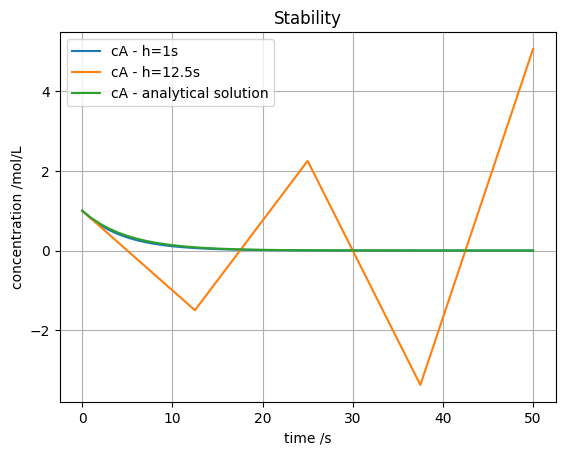

In [24]:
fig, ax = plt.subplots()
ax.plot(t_fine, c_fine[0,:], label = f"cA - h=1s")
ax.plot(t_coarse, c_coarse[0,:], label = f"cA - h=12.5s")
ax.plot(t_fine, cA_analytical(0.2, t_fine), label = "cA - analytical solution")
ax.set_xlabel("time /s")
ax.set_ylabel("concentration /mol/L")
ax.set_title("Stability")
ax.legend()
ax.grid()
fig.show()